# Lineage selection

For this course, we will use a custom pre-processed single-cell multiome dataset of 10k human Peripheral Blood Mononuclear Cells (PBMCs) from 10x Genomics.

Most single-cell analyses in python use the framework `scanpy`. In case you are not familiar with it, [here](https://scanpy.readthedocs.io/) is its documentation and tutorials.

`scanpy` uses the object `AnnData` to manage single-cell data. Here is how to load the pre-processed `AnnData` object using `scanpy`:

In [1]:
import scanpy as sc

adata = sc.read_h5ad('pbmc.h5ad')
adata

AnnData object with n_obs × n_vars = 5666 × 19130
    obs: 'cell_type', 'Mono_pseudotime', 'CD8_pseudotime', 'B_pseudotime'
    var: 'gene_ids'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

Inside an `AnnData` object we have different attributes, here are the most important ones:
* X: This is where the main assay is stored. At the beginning here are the raw integer gene counts
* obs: Metadata dataframe for cells (rows)
* var: Metadata dataframe for genes (columns)
* obsm: Multivariate metadata per observation, such as UMAP embeddings
* uns: Extra attributes

You can read more about it in the official [documentation](https://anndata.readthedocs.io/en/latest/index.html)

<img src="https://anndata.readthedocs.io/en/latest/_images/anndata_schema.svg" width="400" height="500" />

Explore some of its attributes (for example `adata.obs`):

In [2]:
adata.obs

,cell_type,Mono_pseudotime,CD8_pseudotime,B_pseudotime
cells,,,,
AAACAGCCACCAACCG-1,CD8 Naive,NaN,0.000000,NaN
AAACAGCCATCCAGGT-1,CD16 Mono,0.866632,NaN,NaN
AAACATGCAAGGTCCT-1,CD8 Naive,NaN,0.049878,NaN
AAACCAACACAATGCC-1,CD14 Mono,0.000000,NaN,NaN
AAACCAACAGGAACTG-1,CD14 Mono,0.128195,NaN,NaN
...,...,...,...,...
TTTGTGTTCTCCATAT-1,CD14 Mono,0.053367,NaN,NaN
TTTGTTGGTCAGGAAG-1,CD14 Mono,0.111270,NaN,NaN
TTTGTTGGTGACATGC-1,CD8 Naive,NaN,0.085721,NaN


Visualize metadata in UMAP:

/home/badi/bin/conda/envs/celloracle/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


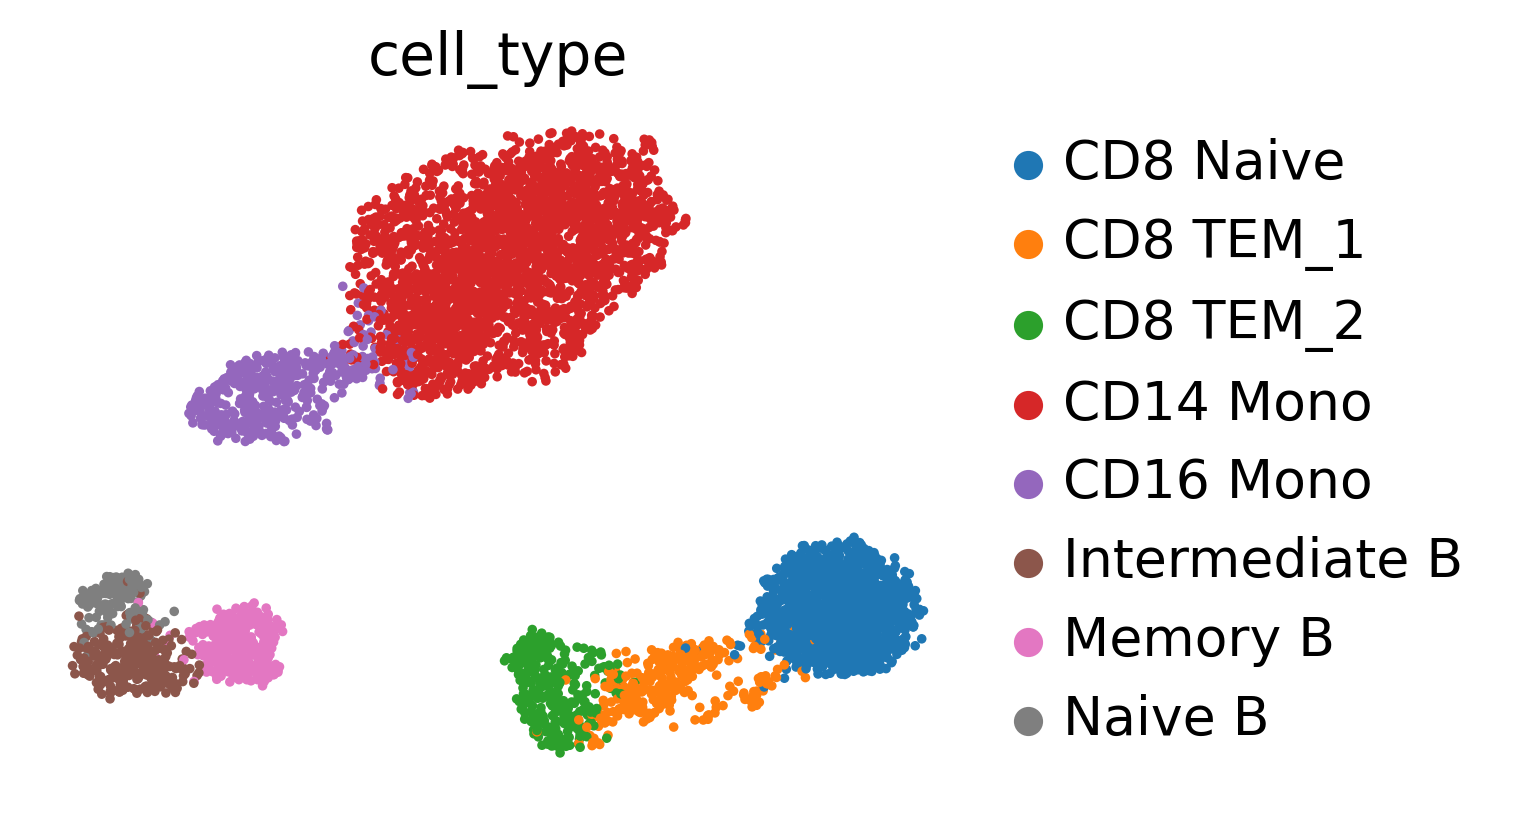

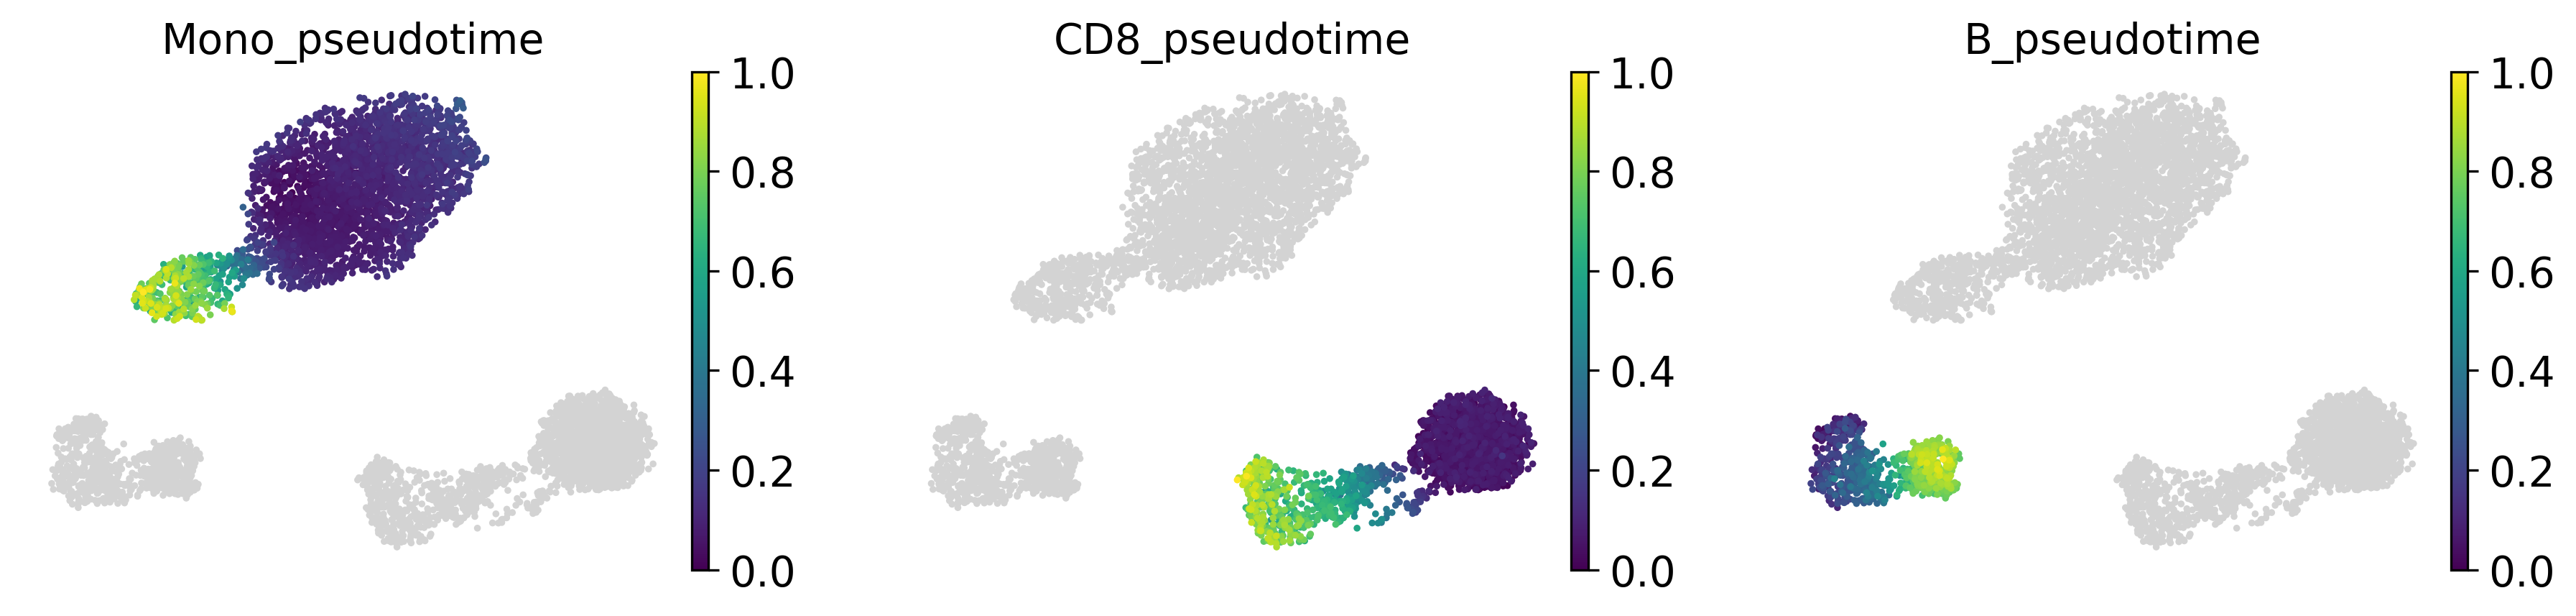

In [3]:
sc.set_figure_params(dpi=150, figsize=(4, 3), frameon=False)
sc.pl.umap(
    adata,
    color='cell_type',
)
sc.pl.umap(
    adata,
    color=['Mono_pseudotime', 'CD8_pseudotime', 'B_pseudotime'],
)

Discuss with your group which lineage to pick and subset data:

In [4]:
lineage = 'Mono_pseudotime'  # Pick lineage

ldata = adata[~adata.obs[lineage].isna()].copy()  # Subset original data
ldata

AnnData object with n_obs × n_vars = 2996 × 19130
    obs: 'cell_type', 'Mono_pseudotime', 'CD8_pseudotime', 'B_pseudotime'
    var: 'gene_ids'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

Visualize:

/home/badi/bin/conda/envs/celloracle/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


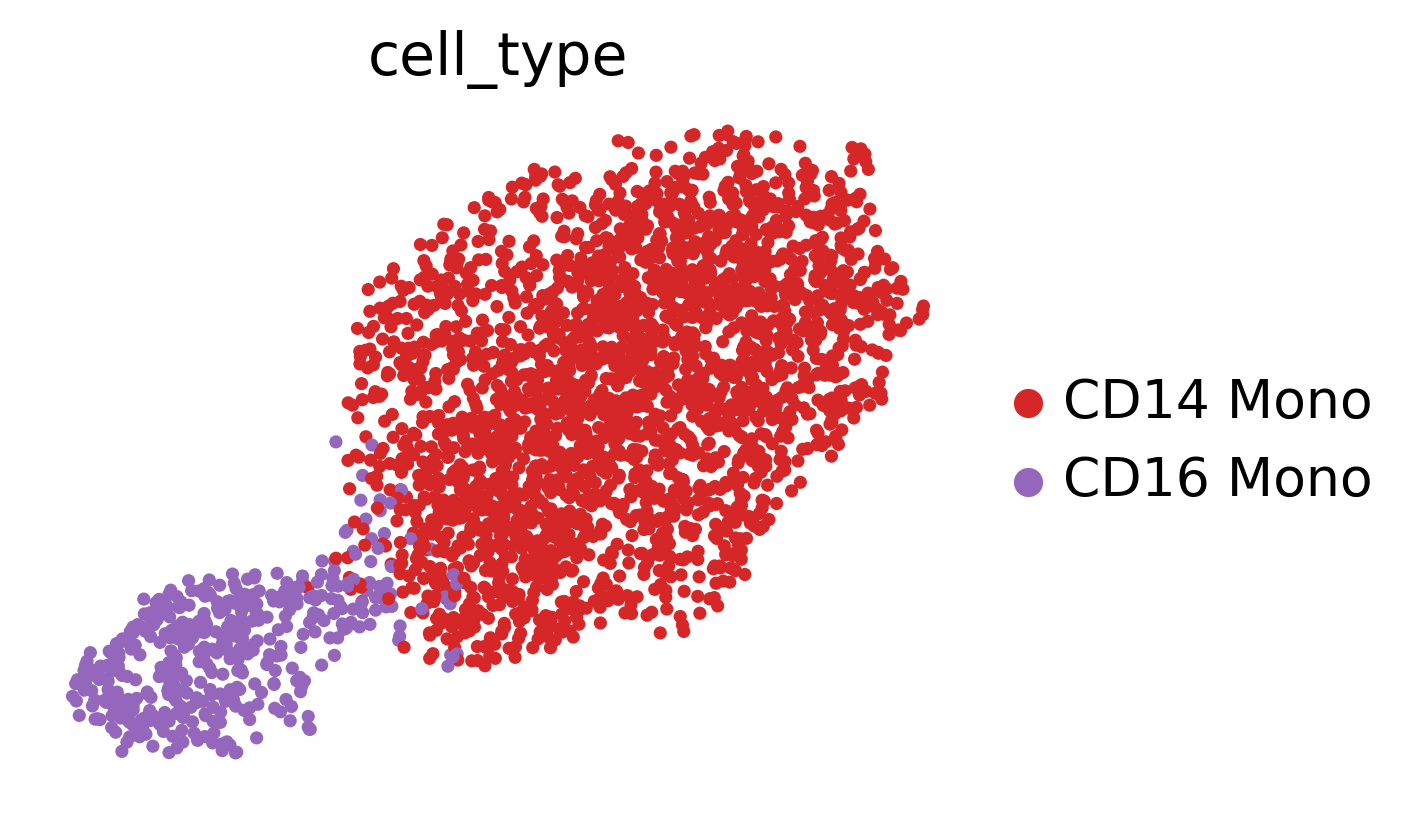

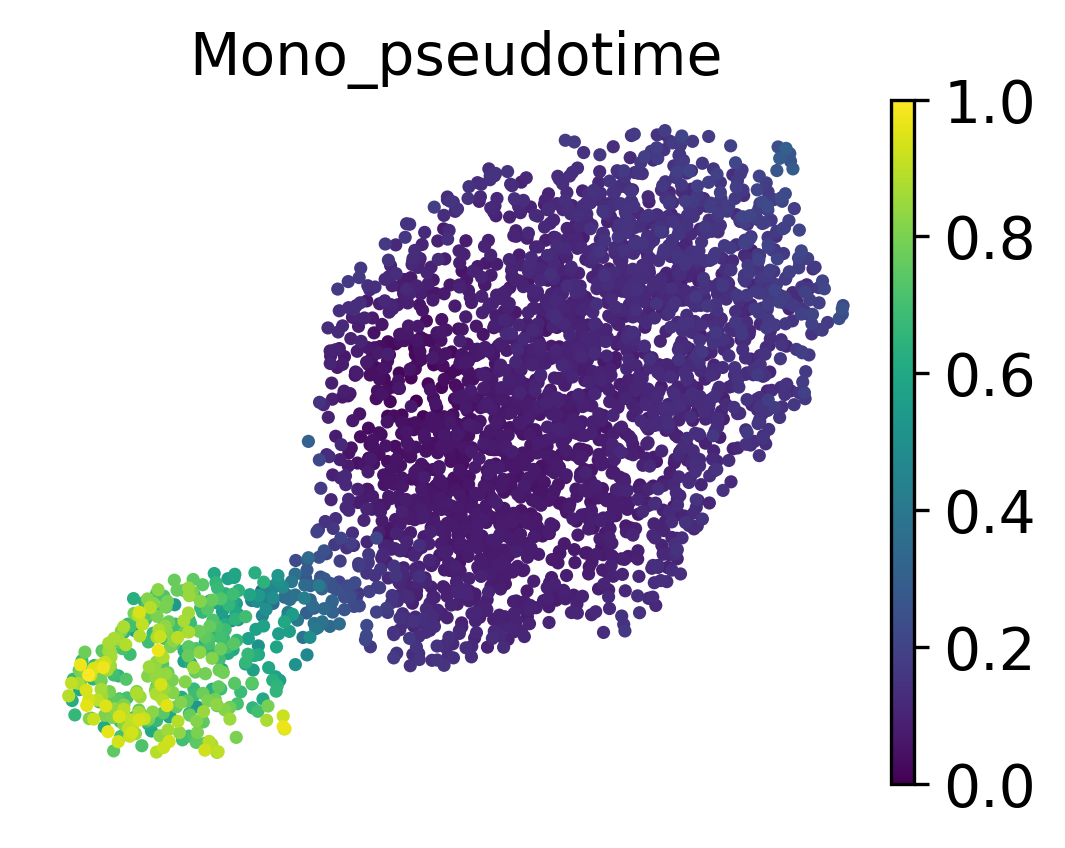

In [5]:
sc.pl.umap(
    ldata,
    color='cell_type',
)
sc.pl.umap(
    ldata,
    color=lineage,
)

Save:

In [6]:
adata.write('lineage.h5ad')